<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Titillium+Web:ital,wght@0,200;0,300;0,400;0,600;0,700;0,900;1,200;1,300;1,400;1,600;1,700&display=swap" rel="stylesheet">
<div class="box" style="padding: 10px; margin: 10px 0; background-color: gray; color: white; border-radius: 5px; font-size: 15px;">
  <table style="padding: 10px; margin: auto auto; background-color: gray;  border-radius: 5px; font-size: 15px;">
      <tr>
          <th colspan='2'><h1 style="text-align: center">
Machine Learning </br>
</h1>
<h2 style="text-align: center">
Course Assignment Two </br>
</h2>
</th>
<tr>
    <tr>
      <th colspan="2">Personal Info</th>
    </tr>
    <tr>
      <td>First Name:</td>
      <td>Ali</td>
    </tr>
    <tr>
      <td>Last Name:</td>
      <td>Nikkhah</td>
    </tr>
    <tr>
      <td>Student Number:</td>
      <td>99102445</td>
    </tr>
    <tr>
      <td>Github:</td>
      <td><a href="https://github.com/AliNikkhah2001/MachineLearning01" target="_blank">https://github.com/AliNikkhah2001/MachineLearning01</a></td>
    </tr>
  </table>
</div>



In [1]:
student_id =99102445   #@param {type:"integer"}
student_name = "Ali Nikkhah" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99102445
your name: Ali Nikkhah


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [3]:
import numpy as np

In [4]:
import numpy as np

def myPCA(X, num_components):
    # Step 1: Mean center the data
    X_meaned = X - np.mean(X, axis=0)
    
    # Step 2: Calculate the covariance matrix of the mean-centered data
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    
    # Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 4: Sort the eigenvalues and their corresponding eigenvectors in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    
    # Step 5: Select the top 'num_components' eigenvectors (principal components)
    eigenvector_subset = sorted_eigenvectors[:, :num_components]
    
    # Step 6: Transform the data by projecting it onto the new subspace
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    
    return X_reduced


In [5]:
# Example usage
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

num_components = 2
X_reduced = myPCA(X, num_components)
print(X_reduced)


[[ 0.82797019 -0.17511531]
 [-1.77758033  0.14285723]
 [ 0.99219749  0.38437499]
 [ 0.27421042  0.13041721]
 [ 1.67580142 -0.20949846]
 [ 0.9129491   0.17528244]
 [-0.09910944 -0.3498247 ]
 [-1.14457216  0.04641726]
 [-0.43804614  0.01776463]
 [-1.22382056 -0.16267529]]


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [8]:
import matplotlib as plt
from sklearn.datasets import load_iris

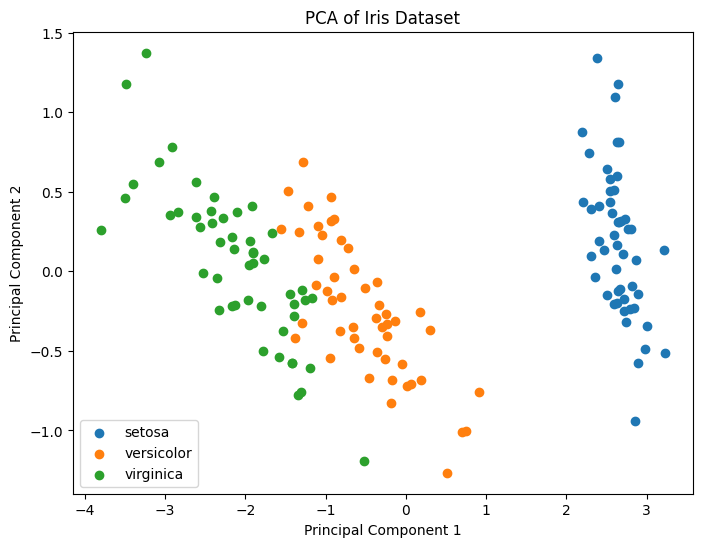

In [6]:

# myPCA on IRIS 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def myPCA(X, num_components):
    # Step 1: Mean center the data
    X_meaned = X - np.mean(X, axis=0)
    
    # Step 2: Calculate the covariance matrix of the mean-centered data
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    
    # Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 4: Sort the eigenvalues and their corresponding eigenvectors in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    
    # Step 5: Select the top 'num_components' eigenvectors (principal components)
    eigenvector_subset = sorted_eigenvectors[:, :num_components]
    
    # Step 6: Transform the data by projecting it onto the new subspace
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    
    return X_reduced

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA and reduce to 2D
X_reduced = myPCA(X, 2)

# Plot the results
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    subset = X_reduced[y == target]
    plt.scatter(subset[:, 0], subset[:, 1], label=iris.target_names[target])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `
### Eigenfaces and PCA

**Eigenfaces** are a set of principal components derived from the covariance matrix of a set of face images. These principal components, or "eigenfaces," represent the directions in which the images vary the most. They are used in the field of facial recognition and image processing.

#### How Eigenfaces Are Related to PCA

1. **Image Representation**:
   - Each face image is represented as a high-dimensional vector. For instance, a grayscale image of size 100x100 pixels can be represented as a vector of 10,000 elements (pixels).

2. **Mean Centering**:
   - Compute the mean face image and subtract it from each face image vector to center the data around the origin.

3. **Covariance Matrix**:
   - Construct the covariance matrix of the centered data. This matrix captures the variance and the relationship between the different pixels of the face images.

4. **Eigenvectors and Eigenvalues**:
   - Perform PCA on the covariance matrix to compute its eigenvalues and eigenvectors. The eigenvectors represent the directions of maximum variance in the data (principal components).

5. **Eigenfaces**:
   - The eigenvectors (principal components) of the covariance matrix are reshaped back into the original image dimensions, resulting in "eigenfaces." Each eigenface can be thought of as a template that highlights certain facial features, such as eyes, nose, or mouth.

6. **Dimensionality Reduction**:
   - By projecting the original face images onto the top eigenfaces (principal components), we reduce the dimensionality of the data while preserving the most important features. This reduces computational complexity and helps in efficient storage and processing.

7. **Face Recognition**:
   - In facial recognition, an unknown face image is projected onto the space spanned by the eigenfaces to obtain a set of weights (coefficients). These weights are then compared with the weights of known faces in the database. The closest match determines the identity of the unknown face.

#### Advantages of Using Eigenfaces

- **Reduction in Dimensionality**:
  - By using only the top eigenfaces, we significantly reduce the dimensionality of the data, making computations more efficient.
  
- **Feature Extraction**:
  - Eigenfaces capture the most significant features of face images, which are useful for tasks like facial recognition.

- **Noise Reduction**:
  - PCA helps in filtering out noise and irrelevant information, focusing on the most important variations in the face images.

#### Visual Representation

- Eigenfaces often look like blurry or abstract versions of human faces. The first few eigenfaces capture the most significant variations, while later ones capture finer details.

### Conclusion

Eigenfaces, derived through PCA, are a powerful technique for facial recognition. They allow for efficient data representation and extraction of significant features from face images, enabling accurate and computationally feasible recognition systems.

### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

In [7]:
!pip install opencv-python

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

Original training data shape: (200, 2304)
PCA transformed training data shape: (200, 45)
Original test data shape: (200, 2304)
PCA transformed test data shape: (200, 45)


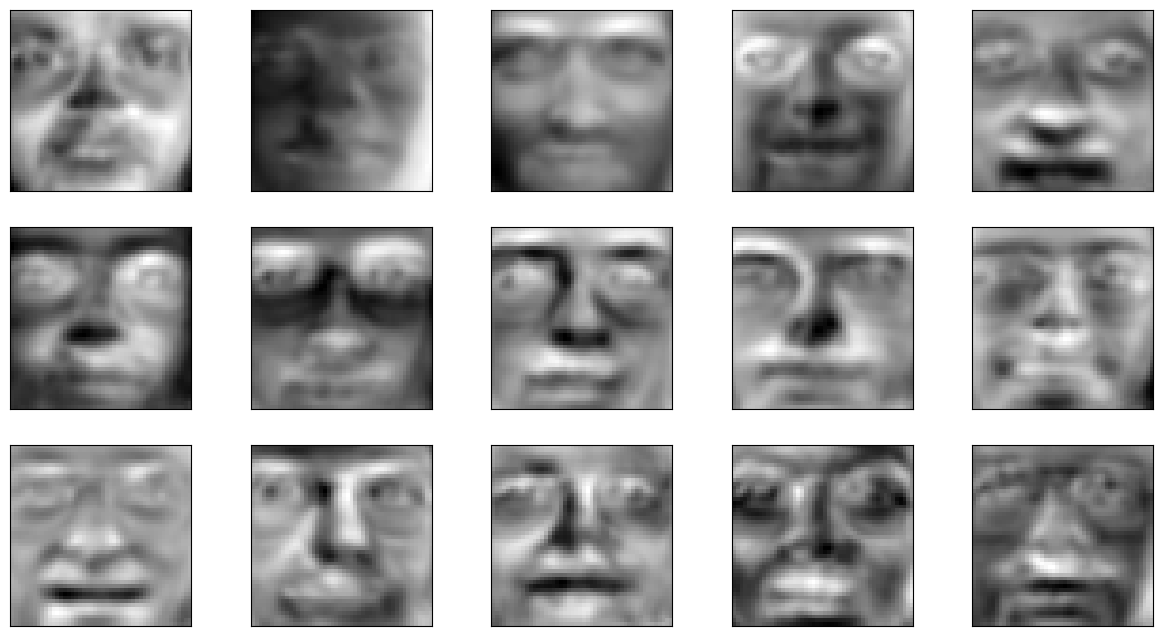

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

def create_train_test_data(data_folder):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    label = 0

    image_shape = None

    for person_name in sorted(os.listdir(data_folder)):
        person_folder = os.path.join(data_folder, person_name)
        if os.path.isdir(person_folder):
            images = load_images_from_folder(person_folder)
            if image_shape is None:
                image_shape = images[0].shape
            # Use the first 5 images for training
            X_train.extend(images[:5])
            y_train.extend([label] * 5)
            # Use the next 5 images for testing
            X_test.extend(images[5:10])
            y_test.extend([label] * 5)
            label += 1

    # Convert lists to numpy arrays
    X_train = np.array([img.flatten() for img in X_train])
    X_test = np.array([img.flatten() for img in X_test])
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    return X_train, X_test, y_train, y_test, image_shape

# Load the dataset
data_folder = 'ORL'
X_train, X_test, y_train, y_test, image_shape = create_train_test_data(data_folder)

# Perform PCA on the data
num_components = 45
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the shape of the data after PCA
print("Original training data shape:", X_train.shape)
print("PCA transformed training data shape:", X_train_pca.shape)
print("Original test data shape:", X_test.shape)
print("PCA transformed test data shape:", X_test_pca.shape)

# Optional: Visualize some of the eigenfaces
eigenfaces = pca.components_.reshape((num_components, *image_shape))
fig, axes = plt.subplots(3, 5, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
plt.show()


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Number of PCA components: 100, Accuracy: 0.9350
Number of PCA components: 90, Accuracy: 0.9450
Number of PCA components: 80, Accuracy: 0.9200
Number of PCA components: 70, Accuracy: 0.9150
Number of PCA components: 60, Accuracy: 0.9000
Number of PCA components: 50, Accuracy: 0.9250
Number of PCA components: 40, Accuracy: 0.9150
Number of PCA components: 30, Accuracy: 0.9150
Number of PCA components: 20, Accuracy: 0.8700
Number of PCA components: 10, Accuracy: 0.8000


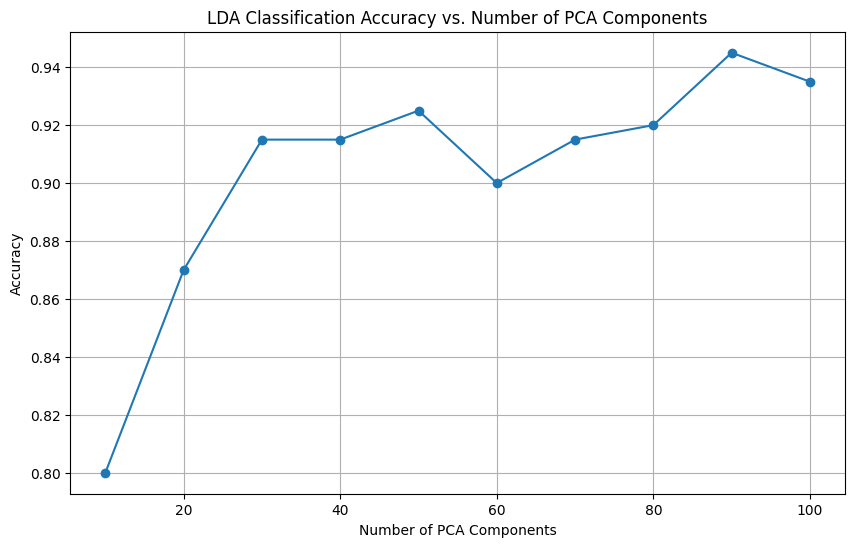

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

def create_train_test_data(data_folder):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    label = 0

    image_shape = None

    for person_name in sorted(os.listdir(data_folder)):
        person_folder = os.path.join(data_folder, person_name)
        if os.path.isdir(person_folder):
            images = load_images_from_folder(person_folder)
            if image_shape is None:
                image_shape = images[0].shape
            # Use the first 5 images for training
            X_train.extend(images[:5])
            y_train.extend([label] * 5)
            # Use the next 5 images for testing
            X_test.extend(images[5:10])
            y_test.extend([label] * 5)
            label += 1

    # Convert lists to numpy arrays
    X_train = np.array([img.flatten() for img in X_train])
    X_test = np.array([img.flatten() for img in X_test])
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    return X_train, X_test, y_train, y_test, image_shape

# Load the dataset
data_folder = 'ORL'
X_train, X_test, y_train, y_test, image_shape = create_train_test_data(data_folder)

# Define a range of PCA components to test
components_range = range(100, 9, -10)
accuracies = []

for num_components in components_range:
    # Perform PCA on the data
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train LDA classifier
    lda = LDA()
    lda.fit(X_train_pca, y_train)
    y_pred = lda.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Number of PCA components: {num_components}, Accuracy: {accuracy:.4f}')

# Plot the accuracy vs. number of PCA components
plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracies, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('LDA Classification Accuracy vs. Number of PCA Components')
plt.grid(True)
plt.show()


 ### Analysis of PCA Components and LDA Classification Accuracy

The plot and accuracy values provided show the performance of an LDA classifier on PCA-transformed data with varying numbers of PCA components. Let's analyze and discuss the results.

#### Observations:

1. **Accuracy Trend**:
   - As the number of PCA components increases from 10 to 100, the classification accuracy generally improves, with some fluctuations.
   - The accuracy peaks at 90 PCA components with an accuracy of 0.9450.

2. **High Dimensionality (80-100 Components)**:
   - At 100 components, the accuracy is 0.9350.
   - At 90 components, the highest accuracy of 0.9450 is achieved.
   - At 80 components, the accuracy is 0.9200.
   - These results suggest that using a higher number of components close to the original data dimensionality can capture more variance, leading to better classification performance.

3. **Moderate Dimensionality (40-70 Components)**:
   - At 70 components, the accuracy is 0.9150.
   - At 60 components, the accuracy is 0.9000.
   - At 50 components, the accuracy is 0.9250.
   - At 40 components, the accuracy is 0.9150.
   - In this range, the accuracy is quite stable, indicating that a moderate number of components is sufficient to maintain good classification performance.

4. **Low Dimensionality (10-30 Components)**:
   - At 30 components, the accuracy is 0.9150.
   - At 20 components, the accuracy drops to 0.8700.
   - At 10 components, the accuracy is the lowest at 0.8000.
   - This suggests that reducing the number of components too much can lead to loss of critical information, negatively impacting classification accuracy.

#### Sufficient Number of Features:

- The plot and accuracy values indicate that using around 50 to 90 PCA components generally yields high accuracy, with the best performance at 90 components.
- **Optimal Range**: Based on the results, an optimal range for the number of PCA components would be between 50 and 90, balancing computational efficiency and classification performance.
- **Recommended Features**: Around 90 PCA components are recommended as it provides the highest accuracy. However, if computational efficiency is a priority, using around 50 components can still achieve good accuracy with lower computational cost.

### Conclusion:

Using PCA to reduce dimensionality before training an LDA classifier can significantly affect the classification performance. The results show that while a higher number of PCA components generally improves accuracy, there is a point of diminishing returns. For this dataset, using around 50 to 90 components strikes a good balance between maintaining high accuracy and reducing computational complexity.